In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('HousePricePrediction.csv')
df1=df.copy()
df=df.dropna()
df=df.drop(['Id','Exterior1st','LotConfig'],axis=1)

<Axes: xlabel='Area', ylabel='SalePrice'>

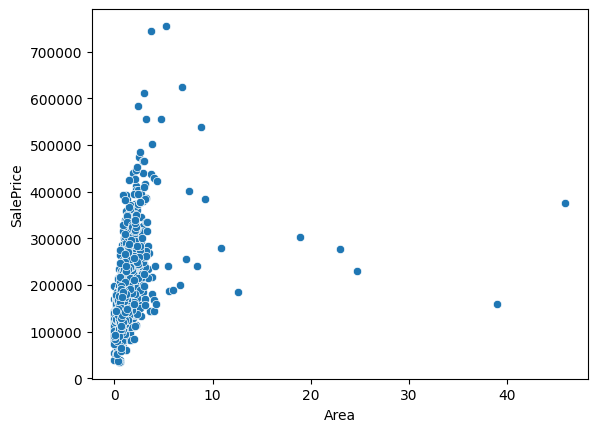

In [55]:
sns.scatterplot(x=x['Area'],y=df1['SalePrice'])

In [14]:
x

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
0,60,8450,5,22,22,0.0,856.0,0,0,0,1,0,1,0,0,0,0
1,20,9600,8,49,49,0.0,1262.0,0,0,0,1,0,1,0,0,0,0
2,60,11250,5,24,23,0.0,920.0,0,0,0,1,0,1,0,0,0,0
3,70,9550,5,110,55,0.0,756.0,0,0,0,1,0,1,0,0,0,0
4,60,14260,5,25,25,0.0,1145.0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,5,26,25,0.0,953.0,0,0,0,1,0,1,0,0,0,0
1456,20,13175,6,47,37,163.0,1542.0,0,0,0,1,0,1,0,0,0,0
1457,70,9042,9,84,19,0.0,1152.0,0,0,0,1,0,1,0,0,0,0
1458,20,9717,6,75,29,1029.0,1078.0,0,0,0,1,0,1,0,0,0,0


In [5]:
df=pd.get_dummies(df,columns=['MSZoning','BldgType'],dtype='int64')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1460 non-null   int64  
 1   LotArea           1460 non-null   int64  
 2   OverallCond       1460 non-null   int64  
 3   YearBuilt         1460 non-null   int64  
 4   YearRemodAdd      1460 non-null   int64  
 5   BsmtFinSF2        1460 non-null   float64
 6   TotalBsmtSF       1460 non-null   float64
 7   SalePrice         1460 non-null   float64
 8   MSZoning_C (all)  1460 non-null   int64  
 9   MSZoning_FV       1460 non-null   int64  
 10  MSZoning_RH       1460 non-null   int64  
 11  MSZoning_RL       1460 non-null   int64  
 12  MSZoning_RM       1460 non-null   int64  
 13  BldgType_1Fam     1460 non-null   int64  
 14  BldgType_2fmCon   1460 non-null   int64  
 15  BldgType_Duplex   1460 non-null   int64  
 16  BldgType_Twnhs    1460 non-null   int64  
 17  

In [7]:
df['YearRemodAdd']=2025-df['YearRemodAdd']
df['YearBuilt']=2025-df['YearBuilt']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1460 non-null   int64  
 1   LotArea           1460 non-null   int64  
 2   OverallCond       1460 non-null   int64  
 3   YearBuilt         1460 non-null   int64  
 4   YearRemodAdd      1460 non-null   int64  
 5   BsmtFinSF2        1460 non-null   float64
 6   TotalBsmtSF       1460 non-null   float64
 7   SalePrice         1460 non-null   float64
 8   MSZoning_C (all)  1460 non-null   int64  
 9   MSZoning_FV       1460 non-null   int64  
 10  MSZoning_RH       1460 non-null   int64  
 11  MSZoning_RL       1460 non-null   int64  
 12  MSZoning_RM       1460 non-null   int64  
 13  BldgType_1Fam     1460 non-null   int64  
 14  BldgType_2fmCon   1460 non-null   int64  
 15  BldgType_Duplex   1460 non-null   int64  
 16  BldgType_Twnhs    1460 non-null   int64  
 17  

In [9]:
x=df.drop('SalePrice',axis=1)
y=df['SalePrice']

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model

LinearRegression()

In [12]:
model.fit(x_train,y_train)

LinearRegression()

In [13]:
y_pred=model.predict(x_test)
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print('r2 score is:',r2)
n=x_test.shape[0]
p=x_test.shape[1]
adj_r=1-((1-r2)*(n-1)/(n-p-1))
print('ajuted r2 score is:',adj_r)

r2 score is: 0.6262060385351427
ajuted r2 score is: 0.6030144423858632


In [15]:
x['LotArea']/=1000
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print('r2 score is:',r2)
n=x_test.shape[0]
p=x_test.shape[1]
adj_r=1-((1-r2)*(n-1)/(n-p-1))
print('ajuted r2 score is:',adj_r)

r2 score is: 0.6262060385351448
ajuted r2 score is: 0.6030144423858654


In [23]:
x['is_renew']=x['YearBuilt']==x['YearRemodAdd']
x['is_renew'] = x['is_renew'].astype('int64')

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print('r2 score is:',r2)
n=x_test.shape[0]
p=x_test.shape[1]
adj_r=1-((1-r2)*(n-1)/(n-p-1))
print('ajuted r2 score is:',adj_r)

r2 score is: 0.6336747849787518
ajuted r2 score is: 0.60952147409823


In [33]:
x['is']=x['BsmtFinSF2']==0
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print('r2 score is:',r2)
n=x_test.shape[0]
p=x_test.shape[1]
adj_r=1-((1-r2)*(n-1)/(n-p-1))
print('ajuted r2 score is:',adj_r)

r2 score is: 0.6359560279129617
ajuted r2 score is: 0.6105264857451171


In [45]:
x['is'] = x['is'].astype('int64')
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print('r2 score is:',r2)
n=x_test.shape[0]
p=x_test.shape[1]
adj_r=1-((1-r2)*(n-1)/(n-p-1))
print('ajuted r2 score is:',adj_r)

r2 score is: 0.6359079698332754
ajuted r2 score is: 0.6119019019101946


In [46]:
x

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,is_renew,is
0,60,8.450,5,22,22,856.0,0,0,0,1,0,1,0,0,0,0,1,1
1,20,9.600,8,49,49,1262.0,0,0,0,1,0,1,0,0,0,0,1,1
2,60,11.250,5,24,23,920.0,0,0,0,1,0,1,0,0,0,0,0,1
3,70,9.550,5,110,55,756.0,0,0,0,1,0,1,0,0,0,0,0,1
4,60,14.260,5,25,25,1145.0,0,0,0,1,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7.917,5,26,25,953.0,0,0,0,1,0,1,0,0,0,0,0,1
1456,20,13.175,6,47,37,1542.0,0,0,0,1,0,1,0,0,0,0,0,0
1457,70,9.042,9,84,19,1152.0,0,0,0,1,0,1,0,0,0,0,0,1
1458,20,9.717,6,75,29,1078.0,0,0,0,1,0,1,0,0,0,0,0,0


In [48]:
x['TotalBsmtSF']/=100
x['Area']=x['TotalBsmtSF']*x['LotArea']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print('r2 score is:',r2)
n=x_test.shape[0]
p=x_test.shape[1]
adj_r=1-((1-r2)*(n-1)/(n-p-1))
print('ajuted r2 score is:',adj_r)

r2 score is: 0.640913608807731
ajuted r2 score is: 0.6158303682465063


In [51]:
x['YearBuilt']=x['YearBuilt']**0.5
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print('r2 score is:',r2)
n=x_test.shape[0]
p=x_test.shape[1]
adj_r=1-((1-r2)*(n-1)/(n-p-1))
print('ajuted r2 score is:',adj_r)

r2 score is: 0.640913608807731
ajuted r2 score is: 0.6158303682465063


In [53]:
x['value']=x['TotalBsmtSF']*x['YearBuilt']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print('r2 score is:',r2)
n=x_test.shape[0]
p=x_test.shape[1]
adj_r=1-((1-r2)*(n-1)/(n-p-1))
print('ajuted r2 score is:',adj_r)

r2 score is: 0.6844292033156483
ajuted r2 score is: 0.6611398456267662


In [57]:
x['Area']=x['Area']**2
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print('r2 score is:',r2)
n=x_test.shape[0]
p=x_test.shape[1]
adj_r=1-((1-r2)*(n-1)/(n-p-1))
print('ajuted r2 score is:',adj_r)

r2 score is: 0.6844292033156469
ajuted r2 score is: 0.6611398456267648


In [60]:
x

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,is_renew,is,Area,value
0,60,8.450,5,22.0,22,0.0856,0,0,0,1,0,1,0,0,0,0,1,1,0.723320,1.8832
1,20,9.600,8,49.0,49,0.1262,0,0,0,1,0,1,0,0,0,0,1,1,1.211520,6.1838
2,60,11.250,5,24.0,23,0.0920,0,0,0,1,0,1,0,0,0,0,0,1,1.035000,2.2080
3,70,9.550,5,110.0,55,0.0756,0,0,0,1,0,1,0,0,0,0,0,1,0.721980,8.3160
4,60,14.260,5,25.0,25,0.1145,0,0,0,1,0,1,0,0,0,0,1,1,1.632770,2.8625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7.917,5,26.0,25,0.0953,0,0,0,1,0,1,0,0,0,0,0,1,0.754490,2.4778
1456,20,13.175,6,47.0,37,0.1542,0,0,0,1,0,1,0,0,0,0,0,0,2.031585,7.2474
1457,70,9.042,9,84.0,19,0.1152,0,0,0,1,0,1,0,0,0,0,0,1,1.041638,9.6768
1458,20,9.717,6,75.0,29,0.1078,0,0,0,1,0,1,0,0,0,0,0,0,1.047493,8.0850
